# Examples of reading common data formats
 - This uses the example data in the ncempy repository online
 - The notebook shows how to use the various io functionality of ncempy to read most types of S/TEM data files
 - An example of putting a scale bar on an image is in the last cell

In [2]:
%matplotlib inline

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import ncempy

# Location of test data
 - Here I define the location of the test data available in the ncempy/data/ directory in the repositry

In [3]:
directory_path = Path('../data')

# General reader function
 - There exists a general reader function which opens a file based on its file extension
 - This is the simplest way to get the data from supported files into memory

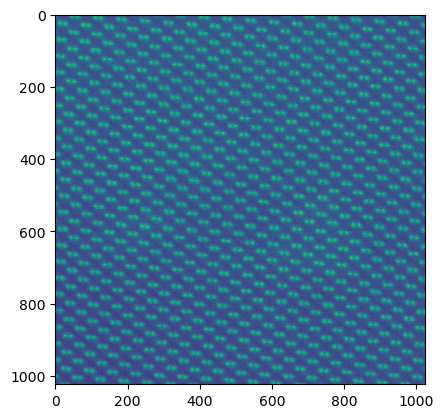

In [5]:
file_path = Path('01_Si110_5images_1.ser')
ser0 = ncempy.read(directory_path / file_path)

fg, ax = plt.subplots(1,1)
ax.imshow(ser0['data'][0, :, :]);

# SER file

data
pixelSize
pixelUnit
pixelOrigin
filename
metadata
------
The X pixel size is 8.67e-12 m


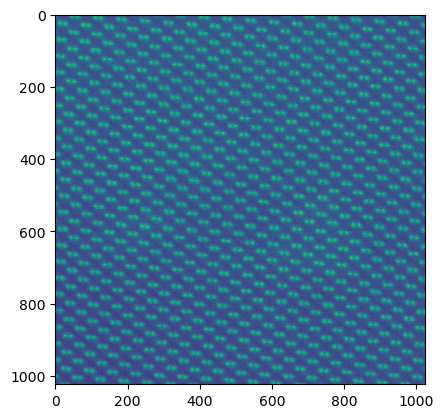

In [11]:
# load a SER file

# Use a string the specify the file path
ser_file = Path('01_Si110_5images_1.ser')

# Read the data using a simple command
# Returns a dictionary of data and meta data
ser0 = ncempy.read(directory_path / ser_file) 

fg, ax = plt.subplots(1, 1)
ax.imshow(ser0['data'][0,:,:])

# Available keys in the dictionary
for key in ser0.keys():
    print(key)
    
# Extract a part of the meta data 
print('------')
print(f'The X pixel size is {ser0["pixelSize"][0]:0.3} {ser0["pixelUnit"][0]}')

# MRC data
 - can read .mrc, .rec, .ali and .st
 - The file is a small one with just random values

pixelSize
voxelSize
cellAngles
axisOrientations
filename
data
pixelUnit


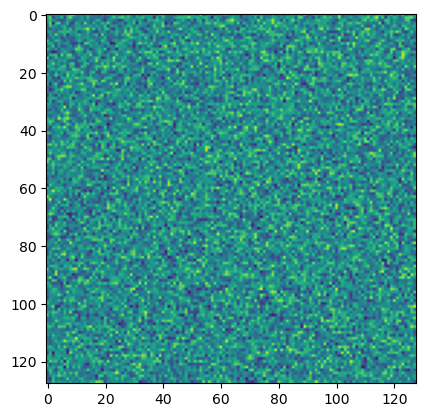

In [12]:
mrc_file = 'temp.mrc' # just random numbers

mrc0 = ncempy.read(directory_path / mrc_file)

fg, ax = plt.subplots(1,1)
ax.imshow(mrc0['data'].sum(axis=0))

# Available meta data
for key in mrc0.keys():
    print(key)


# Read Berkeley formatted EMD files

data
filename
pixelSize
name
pixelUnit
pixelName


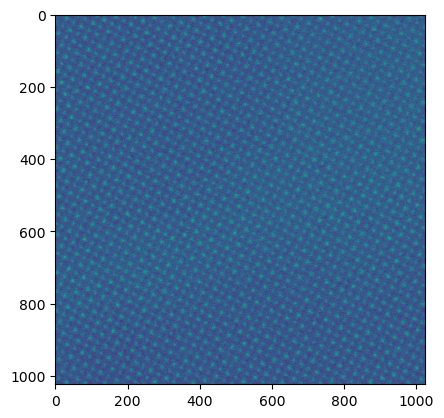

In [14]:
# Load a Berkeley EMD file

emd_file = 'Acquisition_18.emd'

emd0 = ncempy.read(directory_path / emd_file)

fg,ax = plt.subplots(1,1)
axIm = ax.imshow(emd0['data'])

# Print out the pixelSize, which are the dim vectors, names and units
# Available meta data
for key in emd0.keys():
    print(key)

# Read Velox EMD file

data
filename
pixelUnit
pixelSizeUnit
pixelSize
AcquisitionTime
Stage
detectorName
dwellTime


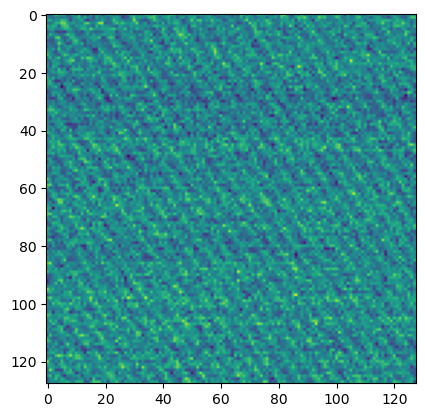

In [17]:
# Read a FEI EMD VELOX file
# This EMD file has 3 STEM data sets in it (HAADF, ADF, BF)

emd_file = 'STEM HAADF-DF4-DF2-BF Diffraction Micro.emd'

# Read in each data set
emdv0 = ncempy.read(directory_path / emd_file, dsetNum=0)

# Plot all three images. If you zoom in they all zoom equally.
fg,ax = plt.subplots(1, 1)
ax.imshow(emdv0['data'])

# Print out the keys in the python dictionary
for key in emdv0.keys():
    print(key)

# Plot an image with a scale bar and color

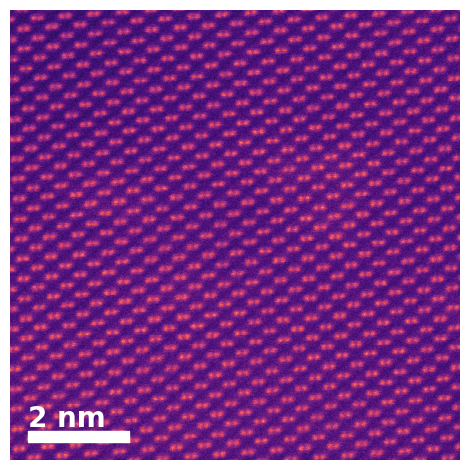

In [33]:
from matplotlib.patches import Rectangle

# Load the data
ser0 = ncempy.read(directory_path / ser_file)
image0 = ser0['data'][0,:,:] # extract 1 image from the series

# Plot the image data
fg, ax = plt.subplots(1,1)
axim = ax.imshow(image0, origin='lower', cmap='magma')
ax.axis('off')

# Users can change the size, height, and position
scale_length = 2 # scale bar length (nm)
scale_height = 25 # height of the scale bar rectangle (pixels)
scale_position = (40, 40) # position of the scale bar on the image from lower left corner

scale_pixels = scale_length/(ser0['pixelSize'][0]*1e9)
scale_rectangle = Rectangle(scale_position,scale_length/(ser0['pixelSize'][0]*1e9),scale_height,color='w')
ax.add_patch(scale_rectangle)
ax.text(scale_position[0], scale_position[1]+scale_height+10,f'{scale_length} nm',
        fontdict={'size':20,'weight':'bold','color':'w'})

fg.tight_layout()